In [79]:
import random
import torch
import torch.optim as optim
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [385]:
### True parameters ###
w = [2.0, -3.4]
b = 4.2
#######################

datasize = 1000
batchsize = 4
epoch_num = 30
#mu = 0 # mean
#sigma = 1# standard deviation

#generate synthetic dataset
dataset = np.zeros((datasize, 2))
label = np.zeros((datasize,1))
noise = np.zeros((datasize,1))

for i in range(datasize):
    dataset[i][0] = random.normalvariate(0,1)
    dataset[i][1] = random.normalvariate(0,1)
    noise[i] = random.normalvariate(0,0.01)
    
    label[i] = np.dot(dataset[i], w) + b + noise[i]

dataset_backup = dataset.copy()
#plt.scatter(dataset[:,0], label)
#plt.scatter(dataset[:,1], label)

def Model(x):
    return torch.matmul(x.float(), pred_w.float())+pred_b

pred_w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
pred_b = torch.zeros(1, requires_grad=True)
print("PRED \t w : [{}, {}] \t b : {}".format(pred_w[0].item(), pred_w[1].item(), pred_b.item()))

train_data = []
for i in range(len(dataset)):
    train_data.append([dataset[i], label[i]])

train = torch.utils.data.DataLoader(train_data, batch_size=batchsize, shuffle=True)
optimizer = optim.SGD([pred_w, pred_b], lr = 0.001)
criterion = nn.MSELoss()

#train_loss = np.zeros(epoch_num)


_dataset = []
_labelset = []
running_loss = []
w_pred = []
w1_pred = []
b_pred = []
w_diff0 = []
w_diff1 = []
b_diff = []
for epoch in range(epoch_num):
    _dataset = []
    _labelset = []
    train_loss = 0.0
    for data, label in train:
        x, y = data, label
        optimizer.zero_grad()
        loss = criterion(Model(x), y.float())
        loss.backward()
        optimizer.step()
        #train_loss[epoch] += loss.item()/(datasize/8)
        train_loss += loss.item()/(datasize/batchsize)
        _dataset.append(Model(x))
        _labelset.append(y)
    running_loss.append(train_loss)
    print(epoch, train_loss)
    #print("PRED epoch : {} \t w : [{}, {}] \t b : {}"
    #      .format(epoch, pred_w[0].item(), pred_w[1].item(), pred_b.item()))
    #print("epoch : {} \t w_diff : [{}, {}] \t b_diff : {}"
    #      .format(epoch, w[0] - pred_w[0].item(), w[1] - pred_w[1].item(), b - pred_b.item()))
    w_pred.append([pred_w[0].item(), pred_w[1].item()])
    #w1_pred.append(pred_w[1].item())
    b_pred.append(pred_b.item())
    w_diff0.append(w[0] - pred_w[0].item())
    w_diff1.append(w[1] - pred_w[1].item())
    b_diff.append(b - pred_b.item())
    #for i in range(len(_dataset)):
    #    plt.scatter(_dataset[i].detach().numpy(), _labelset[i].detach().numpy(), c = "#1f77b4")
    #plt.title("epoch {}".format(epoch))
    #plt.xlabel("X")
    #plt.ylabel("y")
    #plt.savefig("epoch{}".format(epoch))
    #plt.clf()
#print(running_loss)

PRED 	 w : [-0.01147426851093769, 0.001376021420583129] 	 b : 0.0
0 21.094322970390316
1 7.737112405776978
2 2.838469050884247
3 1.041871036082506
4 0.3824960594251752
5 0.14053117806743842
6 0.05167863168660554
7 0.019054239296820027
8 0.007070176662760788
9 0.002665387106797426
10 0.0010446615209075394
11 0.0004490080867763022
12 0.00023054684227463444
13 0.00015013288029876992
14 0.00012061566360807775
15 0.00010975050806200666
16 0.00010573407333868085
17 0.00010433473814464378
18 0.00010379356797693618
19 0.000103556900091462
20 0.00010351202752099202
21 0.00010348658451130174
22 0.00010348094945766202
23 0.00010346620523932871
24 0.00010346642592412542
25 0.00010346524880696961
26 0.00010346841313185008
27 0.00010348895507922858
28 0.00010347666662983099
29 0.0001034667198073294


In [379]:
loss_lr0005 = running_loss.copy()

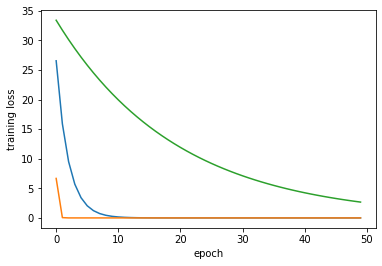

In [383]:
x = np.arange(len(loss_lr0001))
plt.plot(x, np.array(loss_lr0001))
plt.plot(x, np.array(loss_lr001))
plt.plot(x, np.array(loss_lr00001))
#plt.plot(x, np.array(loss_lr0005))
#plt.plot(x, np.array(loss_bs32))
#plt.plot(x, np.array(loss_bs64))
plt.xlabel("epoch")
plt.ylabel("training loss")
plt.savefig("learningrate_conv.png")


In [315]:
label_pred = np.zeros((datasize,1))
for epoch in range(epoch_num):
    for i in range(datasize):
        label_pred[i] = (np.dot(dataset_backup[i], w_pred[epoch]) + b_pred[epoch] + noise[i])
    plt.scatter(dataset_backup[:,0], label_pred)
    plt.scatter(dataset_backup[:,1], label_pred)
    plt.savefig("xyplot-epoch {}".format(epoch))
    plt.clf()
    


<Figure size 432x288 with 0 Axes>

In [312]:
dataset = np.zeros((datasize, 2))
label = np.zeros((datasize,1))
noise = np.zeros((datasize,1))
for i in range(datasize):
    dataset[i][0] = random.normalvariate(0,1)
    dataset[i][1] = random.normalvariate(0,1)
    noise[i] = random.normalvariate(0,0.01)
    
    label[i] = (np.dot(dataset[i], w) + b + noise[i])

In [269]:
_dataset

[tensor([[5.1925],
         [2.7270],
         [0.8375],
         [4.3744]], grad_fn=<AddBackward0>),
 tensor([[ 1.9460],
         [ 2.3031],
         [-2.5340],
         [ 2.2521]], grad_fn=<AddBackward0>),
 tensor([[17.1054],
         [ 9.6373],
         [ 2.2026],
         [ 5.5861]], grad_fn=<AddBackward0>),
 tensor([[1.8817],
         [5.6615],
         [2.2174],
         [2.4427]], grad_fn=<AddBackward0>),
 tensor([[6.6093],
         [7.2663],
         [9.1026],
         [4.2647]], grad_fn=<AddBackward0>),
 tensor([[ 4.3113],
         [ 6.0901],
         [ 8.4657],
         [10.8926]], grad_fn=<AddBackward0>),
 tensor([[ 5.8878],
         [ 4.3192],
         [ 3.4653],
         [13.9317]], grad_fn=<AddBackward0>),
 tensor([[2.4418],
         [8.5058],
         [1.4110],
         [8.0921]], grad_fn=<AddBackward0>),
 tensor([[ 0.3171],
         [-5.6351],
         [ 2.5822],
         [ 4.7841]], grad_fn=<AddBackward0>),
 tensor([[-7.7492],
         [ 8.7102],
         [ 6.2435],
  

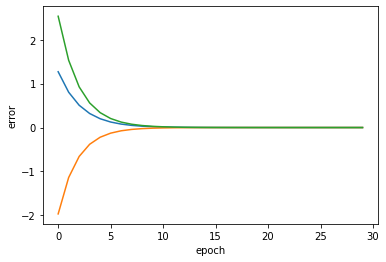

In [331]:
x = np.arange(len(w_diff0))
plt.plot(x, np.array(w_diff0))
plt.plot(x, np.array(w_diff1))
plt.plot(x, np.array(b_diff))
plt.xlabel("epoch")
plt.ylabel("error")
plt.savefig("parametererrorloss.png")

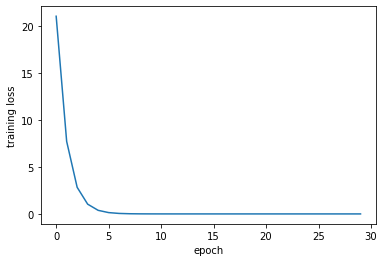

In [391]:
x = np.arange(len(running_loss))
plt.plot(x, np.array(running_loss))
plt.xlabel("epoch")
plt.ylabel("training loss")
plt.savefig("running_loss.png")

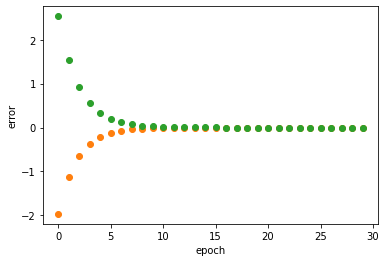

In [322]:

for idx, loss in enumerate(w_diff0):
    #print("epoch: {} \t loss: {}".format(idx, loss))
    plt.plot(idx, loss, c = "#1f77b4")
    
for idx, loss in enumerate(w_diff1):
    #print("epoch: {} \t loss: {}".format(idx, loss))
    plt.scatter(idx, loss, c = "#ff7f0e")
    
for idx, loss in enumerate(b_diff):
    #print("epoch: {} \t loss: {}".format(idx, loss))
    plt.scatter(idx, loss, c = "#2ca02c")
plt.xlabel("epoch")
plt.ylabel("error")
plt.savefig("parametererrorloss.png")

In [267]:
print("TRUE \t w : {} \t b : {}".format(w, b))
print("PRED \t w : [{}, {}] \t b : {}".format(pred_w[0].item(), pred_w[1].item(), pred_b.item()))

TRUE 	 w : [2.0, -3.4] 	 b : 4.2
PRED 	 w : [1.9998645782470703, -3.400280714035034] 	 b : 4.200186252593994


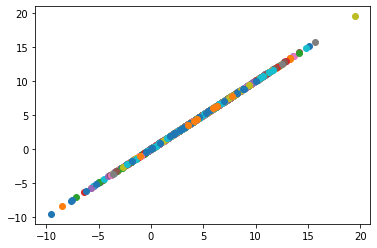

In [228]:
for i in range(len(_dataset)):
    plt.scatter(_dataset[i].detach().numpy(), _labelset[i].detach().numpy())

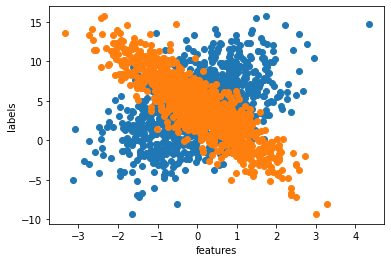

In [256]:
datasize = 1000
batchsize = 4
epoch_num = 30
#mu = 0 # mean
#sigma = 1# standard deviation

#generate synthetic dataset
dataset = np.zeros((datasize, 2))
label = np.zeros((datasize,1))
for i in range(datasize):
    dataset[i][0] = random.normalvariate(0,1)
    dataset[i][1] = random.normalvariate(0,1)
    noise = random.normalvariate(0,0.01)
    
    label[i] = (np.dot(dataset[i], w) + b + noise)
    
plt.scatter(dataset[:,0], label)
plt.scatter(dataset[:,1], label)
plt.xlabel("features")
plt.ylabel("labels")
plt.savefig("feature_label_correlation.png")

In [ ]:
import random
import torch
import torch.optim as optim
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### True parameters ###
w = [2.0, -3.4]
b = 4.2
#######################

datasize = 1000
batchsize = 4
epoch_num = 30

#generate synthetic dataset
dataset = np.zeros((datasize, 2))
label = np.zeros((datasize,1))
noise = np.zeros((datasize,1))

for i in range(datasize):
    dataset[i][0] = random.normalvariate(0,1)
    dataset[i][1] = random.normalvariate(0,1)
    noise[i] = random.normalvariate(0,0.01)
    
    label[i] = np.dot(dataset[i], w) + b + noise[i]

#define model
def Model(x):
    return torch.matmul(x.float(), pred_w.float())+pred_b

pred_w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
pred_b = torch.zeros(1, requires_grad=True)
print("PRED \t w : [{}, {}] \t b : {}".format(pred_w[0].item(), pred_w[1].item(), pred_b.item()))

train_data = []
for i in range(len(dataset)):
    train_data.append([dataset[i], label[i]])

train = torch.utils.data.DataLoader(train_data, batch_size=batchsize, shuffle=True)
optimizer = optim.SGD([pred_w, pred_b], lr = 0.001)
criterion = nn.MSELoss()

#train_loss = np.zeros(epoch_num)


_dataset = []
_labelset = []
running_loss = []
w_pred = []
w1_pred = []
b_pred = []
w_diff0 = []
w_diff1 = []
b_diff = []
for epoch in range(epoch_num):
    _dataset = []
    _labelset = []
    train_loss = 0.0
    for data, label in train:
        x, y = data, label
        optimizer.zero_grad()
        loss = criterion(Model(x), y.float())
        loss.backward()
        optimizer.step()
        #train_loss[epoch] += loss.item()/(datasize/8)
        train_loss += loss.item()/(datasize/batchsize)
        _dataset.append(Model(x))
        _labelset.append(y)
    running_loss.append(train_loss)
    print(epoch, train_loss)
    #print("PRED epoch : {} \t w : [{}, {}] \t b : {}"
    #      .format(epoch, pred_w[0].item(), pred_w[1].item(), pred_b.item()))
    #print("epoch : {} \t w_diff : [{}, {}] \t b_diff : {}"
    #      .format(epoch, w[0] - pred_w[0].item(), w[1] - pred_w[1].item(), b - pred_b.item()))
    w_pred.append([pred_w[0].item(), pred_w[1].item()])
    #w1_pred.append(pred_w[1].item())
    b_pred.append(pred_b.item())
    w_diff0.append(w[0] - pred_w[0].item())
    w_diff1.append(w[1] - pred_w[1].item())
    b_diff.append(b - pred_b.item())
    #for i in range(len(_dataset)):
    #    plt.scatter(_dataset[i].detach().numpy(), _labelset[i].detach().numpy(), c = "#1f77b4")
    #plt.title("epoch {}".format(epoch))
    #plt.xlabel("X")
    #plt.ylabel("y")
    #plt.savefig("epoch{}".format(epoch))
    #plt.clf()
#print(running_loss)